<a href="https://colab.research.google.com/github/samara3823/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

***Objective***:
The main objective of this project is  predict which customer might default in upcoming months. For that we need what is **credit crad** and **credit card default**
**credit card ** : It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.
 **Credit card default**: A Credit card default  happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months

**We had the dataset of customer credit card transaction history for past 6 months, on basis of which we have to predict if customer will default or not.**

**Importing** **Required** **Libraries**

In [1]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sys 
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff 
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score, recall_score

In [2]:
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample 
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from plotly.subplots import make_subplots
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)
pd.set_option('display.max_columns', 50)

**Loading The Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Credit Card Default Prediction - Samara Reddy/default of credit card clients..csv')

In [5]:
#Viewing top five rows of the dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#Viewing Last five rows of the dataset
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [7]:
# Getting the shape of rows and columns present in our dataset
df.shape

(30000, 25)

There are 30000 rows and 25 features in the dataset

In [8]:
# Getting all the feature names
print('Features in the dataset:')
df.columns

Features in the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [9]:
# Checking the basic structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There are 30000 entries and 25 features with all 30000 non null records, indicating we don't have any null values. All the features have int64 datatype. We need to further look into in to segregate the categorical features.

In [10]:
# Checking the descriptive statistics of the features of the data
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29,51223.33,49179.08,4.70e+04,43262.95,40311.40,38871.76,5663.58,5.92e+03,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,1.13,1.15,73635.86,71173.77,6.93e+04,64332.86,60797.16,59554.11,16563.28,2.30e+04,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00,-165580.00,-69777.00,-1.57e+05,-170000.00,-81334.00,-339603.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,3558.75,2984.75,2.67e+03,2326.75,1763.00,1256.00,1000.00,8.33e+02,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,22381.50,21200.00,2.01e+04,19052.00,18104.50,17071.00,2100.00,2.01e+03,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,0.00,0.00,67091.00,64006.25,6.02e+04,54506.00,50190.50,49198.25,5006.00,5.00e+03,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,8.00,8.00,964511.00,983931.00,1.66e+06,891586.00,927171.00,961664.00,873552.00,1.68e+06,896040.00,621000.00,426529.00,528666.00,1.00


As we can see: there is large difference in mean and median for bill paid and bill generated features indicating skewed distribution of data. We will plot them to understand the distribution and outliers if present any. The "default payment next month" is the target variable.

The average value for the amount of credit card limit is 167484. The standard deviation is unusually large, max value being 1000000

Since the average of education is 1.85 we can say that education Level is mostly graduate school and university.

Average age is 35.5 years, with a standard deviation of 9.2

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.22 means that there are 22% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [11]:
# Getting the unique value count of each features
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

**Cleaning the Dataset**

**1.Handling Missing Value**

In [12]:

#checking missing values for every individual feature
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

luckily we don't have any missing values in the dataset.

**2.Duplicate value check**

Duplication means redundant duplicate records in the dataset. This could be possibly due to data entry errors or data collection methods.

removing duplicates from our data set could save investment as it may increase the size of data unncessarily. Also, it could increase the complexity of data while analysis.

In [13]:
# Checking the duplicate values
duplicate_value = df.duplicated().sum()
#value = len(df.duplicated()]) #storing the total duplicated values in the dataset in a variable
print('Total duplicated values in the dataset are:', duplicate_value)

Total duplicated values in the dataset are: 0


So, there are no missing values as well as there are no duplicate records in the dataset

**Data Preprocessing**

Improper structure and formats

Improper struture of data is crucial step from analysis perspective. We should look into the fact the datatype assigned is actually correct pertaining to the data or not. Our goal is to make the dataset more readble and clean so we can perfrom EDA with effective appraoch.

In [14]:
# Rename the columns
df.rename(columns={'LIMIT_BAL': 'credit_limit',
                   'SEX': 'gender',
                   'EDUCATION' : 'education',
                   'MARRIAGE' : 'marital_status',
                   'AGE' : 'age',
                   'PAY_0': 'payment_status_sept',
                   'PAY_2': 'payment_status_aug',
                   'PAY_3': 'payment_status_jul',
                   'PAY_4': 'payment_status_jun',
                   'PAY_5': 'payment_status_may',
                   'PAY_6': 'payment_status_apr',
                   'BILL_AMT1': 'bill_sept',
                   'BILL_AMT2': 'bill_aug',
                   'BILL_AMT3': 'bill_jul',
                   'BILL_AMT4': 'bill_jun',
                   'BILL_AMT5': 'bill_may',
                   'BILL_AMT6': 'bill_apr',
                   'PAY_AMT1': 'payment_amount_sept',
                   'PAY_AMT2': 'payment_amount_aug',
                   'PAY_AMT3': 'payment_amount_jul',
                   'PAY_AMT4': 'payment_amount_jun',
                   'PAY_AMT5': 'payment_amount_may',
                   'PAY_AMT6': 'payment_amount_apr',
                   'dpnm' : 'default_payment',
                   'default payment next month':'IsDefaulter'}, inplace=True)

In [15]:
#converting the categorical features into object datatype
df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr']] =df[['gender','education','marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr']].apply(lambda x: x.astype('object'))

df.info() #checking whether the datatype has updated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   30000 non-null  int64 
 1   credit_limit         30000 non-null  int64 
 2   gender               30000 non-null  object
 3   education            30000 non-null  object
 4   marital_status       30000 non-null  object
 5   age                  30000 non-null  int64 
 6   payment_status_sept  30000 non-null  object
 7   payment_status_aug   30000 non-null  object
 8   payment_status_jul   30000 non-null  object
 9   payment_status_jun   30000 non-null  object
 10  payment_status_may   30000 non-null  object
 11  payment_status_apr   30000 non-null  object
 12  bill_sept            30000 non-null  int64 
 13  bill_aug             30000 non-null  int64 
 14  bill_jul             30000 non-null  int64 
 15  bill_jun             30000 non-null  int64 
 16  bill

In [16]:
#we can either drop the id column, or we can set id column as the index.
df.set_index('ID', inplace = True)
df

,credit_limit,gender,education,marital_status,age,payment_status_sept,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1


Handling Outlier

In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.

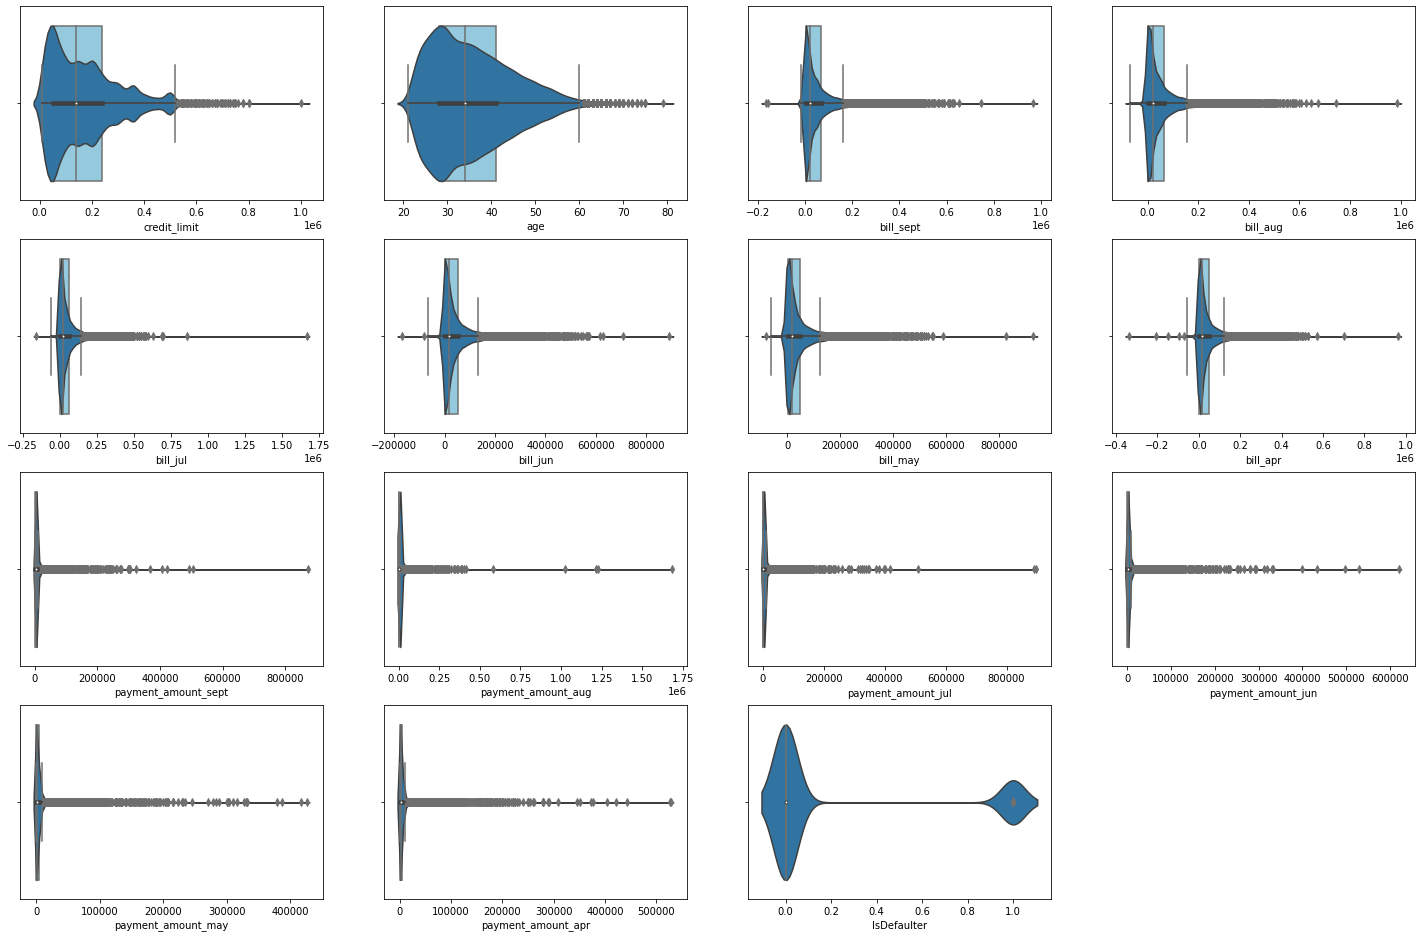

In [17]:
#lets check the distribution of dataset and the if any outliers are present.

#plotting a violin plot for all numerical features
feat_num = df.select_dtypes(include =['int64', 'float64'])

plt.figure(figsize=(25,25))
n=1

for column in feat_num:
  plt.subplot(6,4,n)
  n = n+1
  sns.boxplot(df[column], color ='skyblue' )
  sns.violinplot(df[column])

As we can see, the distribution is close to normal distribution, but we do have many outliers present, which needs to get treated.



Treating Outlier

Here, as the dataset does not follow exact normal distribution. Hence, we will use IQR method to detect the outliers and remove them.

For credit_limit Upper limit is 525000.0, and lower limit is -45000.0
For age Upper limit is 60.5, and lower limit is 21.5
For bill_sept Upper limit is 162389.375, and lower limit is -28207.375
For bill_aug Upper limit is 155538.5, and lower limit is -27526.0
For bill_jul Upper limit is 146412.5, and lower limit is -26083.0
For bill_jun Upper limit is 132774.875, and lower limit is -23762.875
For bill_may Upper limit is 122831.75, and lower limit is -22450.75
For bill_apr Upper limit is 121111.625, and lower limit is -22715.125
For payment_amount_sept Upper limit is 11015.0, and lower limit is -1003.0
For payment_amount_aug Upper limit is 11250.5, and lower limit is -1250.5
For payment_amount_jul Upper limit is 10677.5, and lower limit is -1667.5
For payment_amount_jun Upper limit is 9589.125, and lower limit is -1562.625
For payment_amount_may Upper limit is 9700.0, and lower limit is -1637.0
For payment_amount_apr Upper limit is 9823.375, and lower limit is -1823.375
For IsDefaulter 

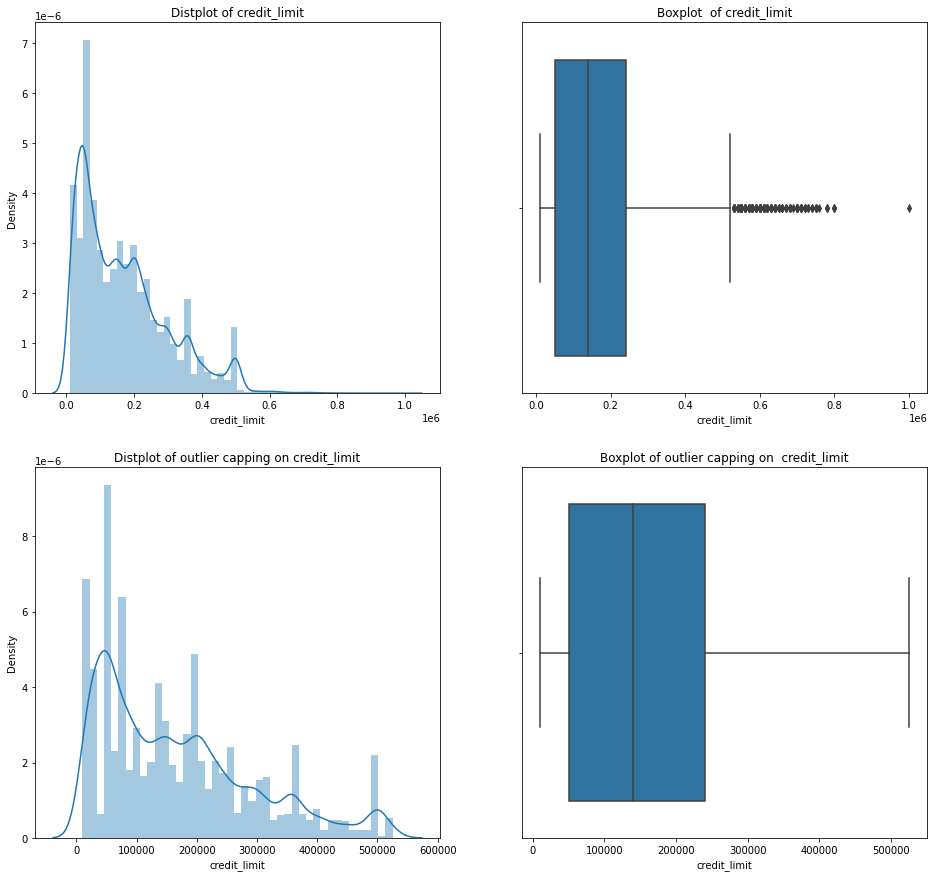

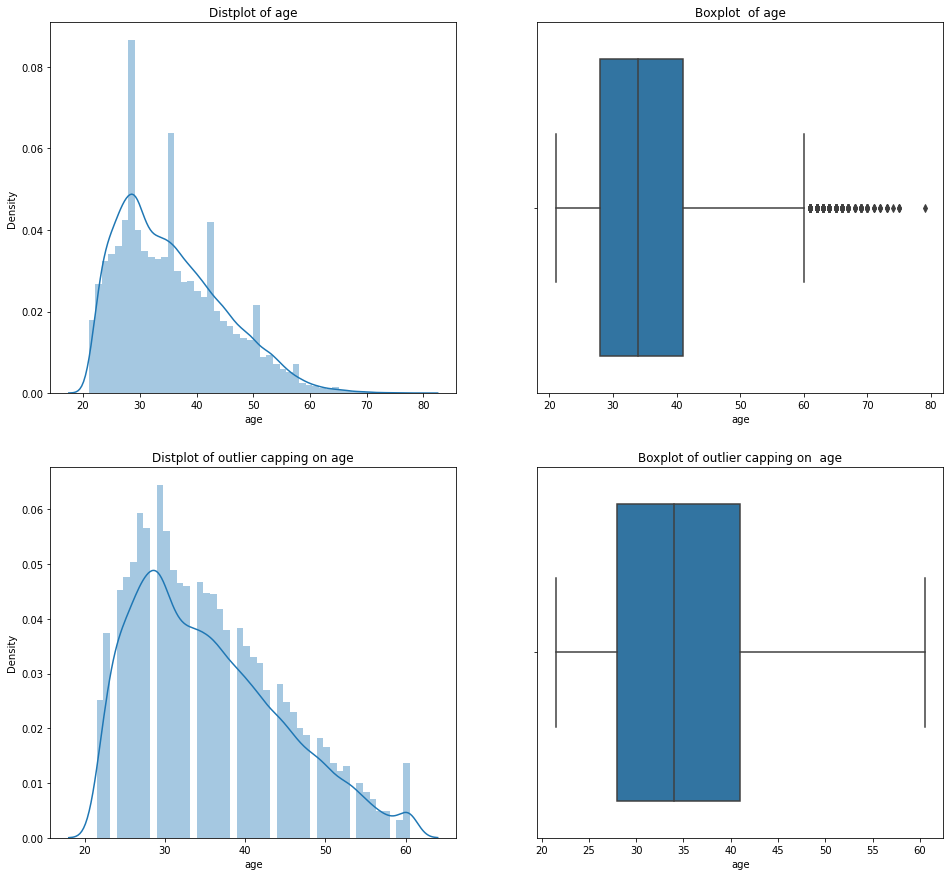

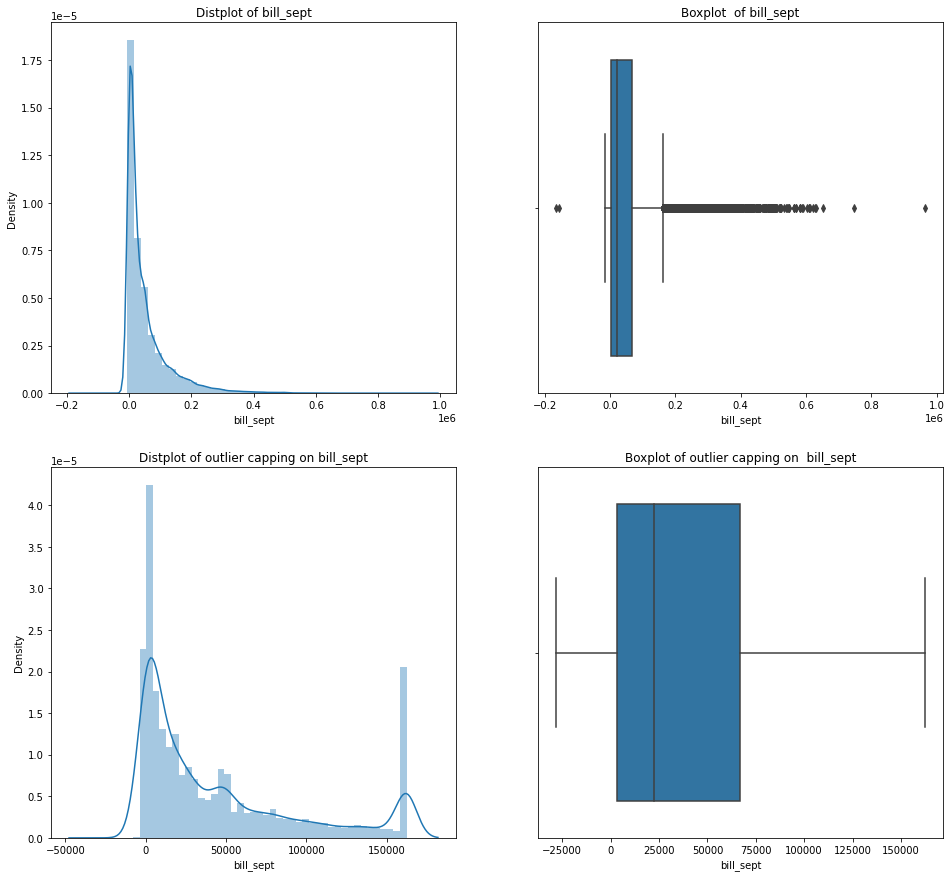

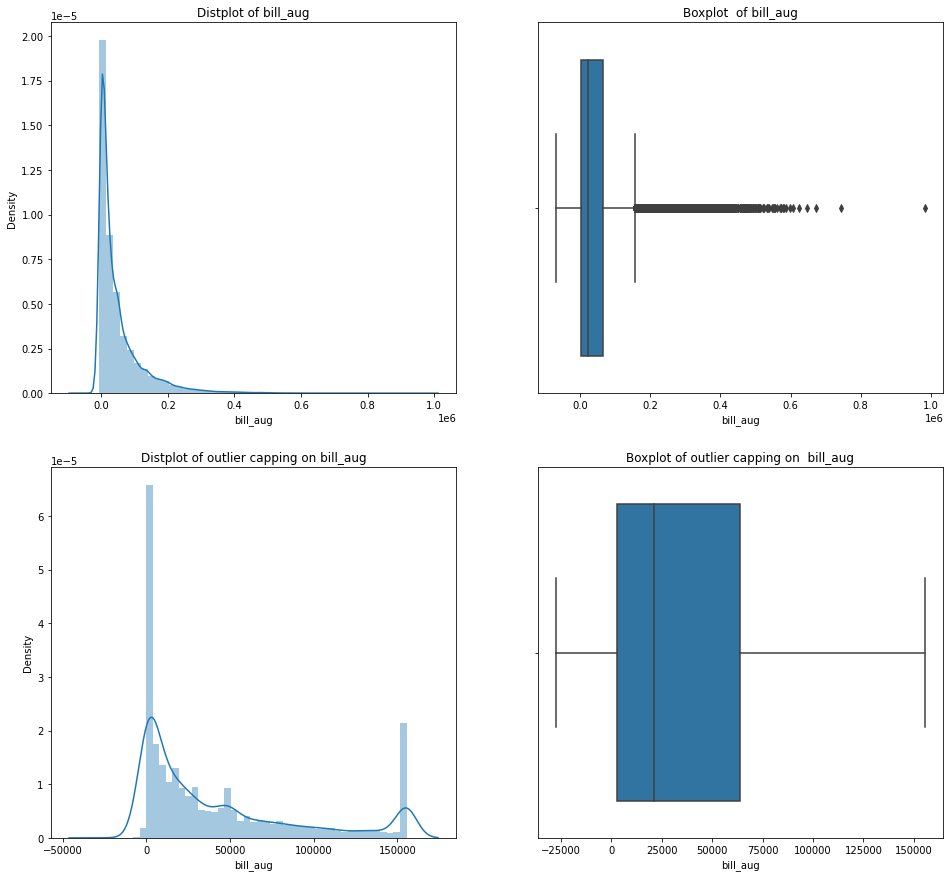

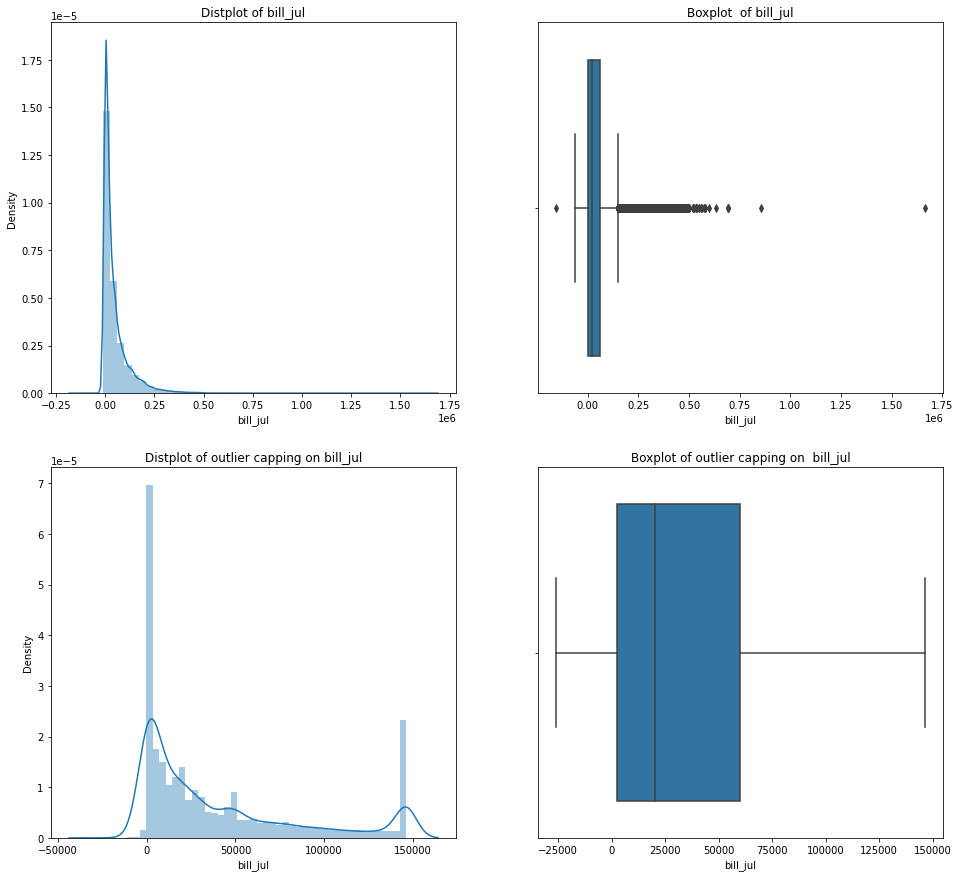

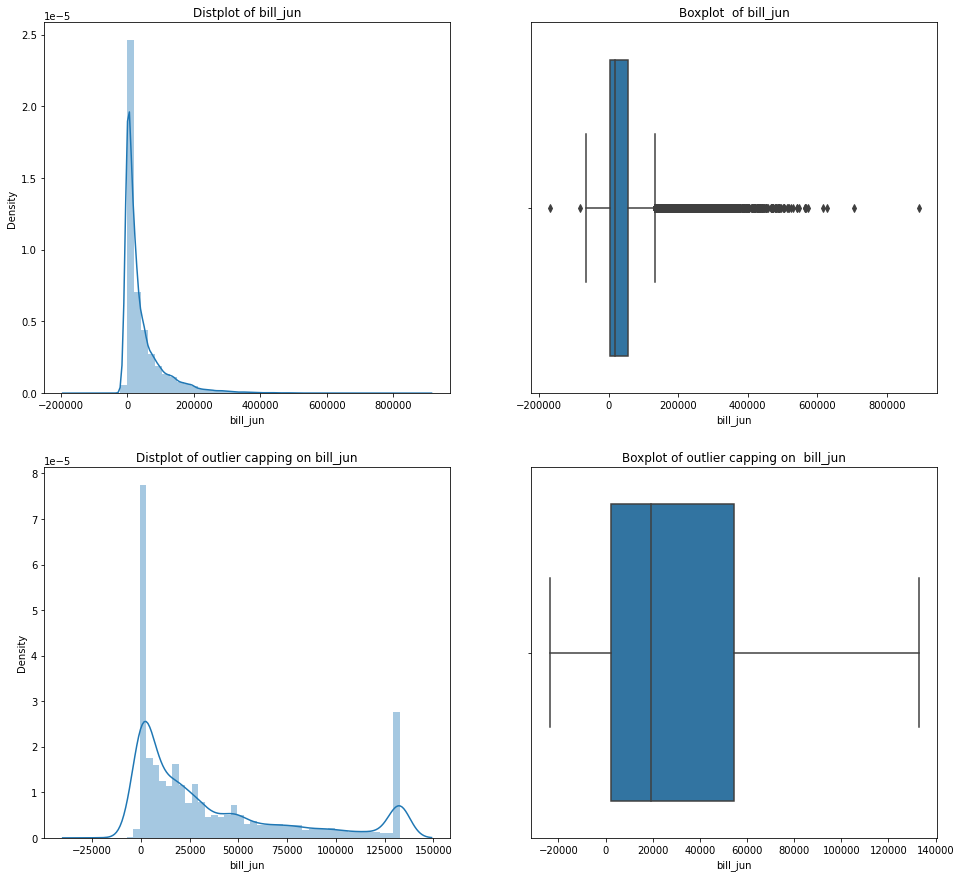

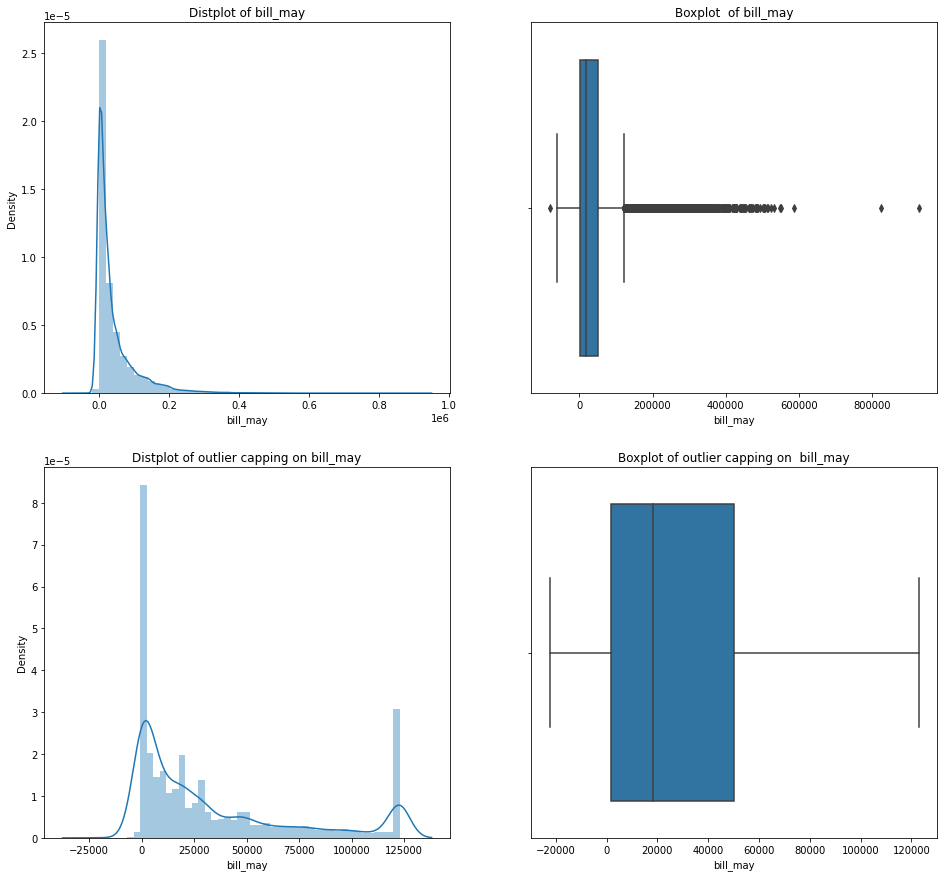

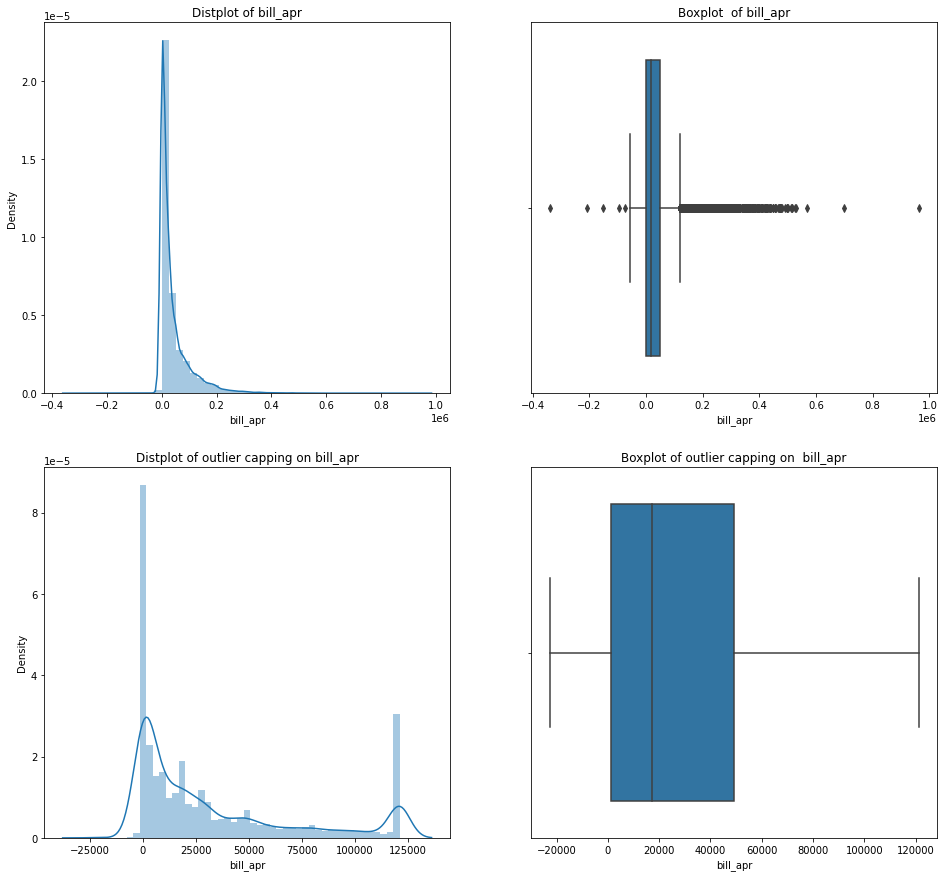

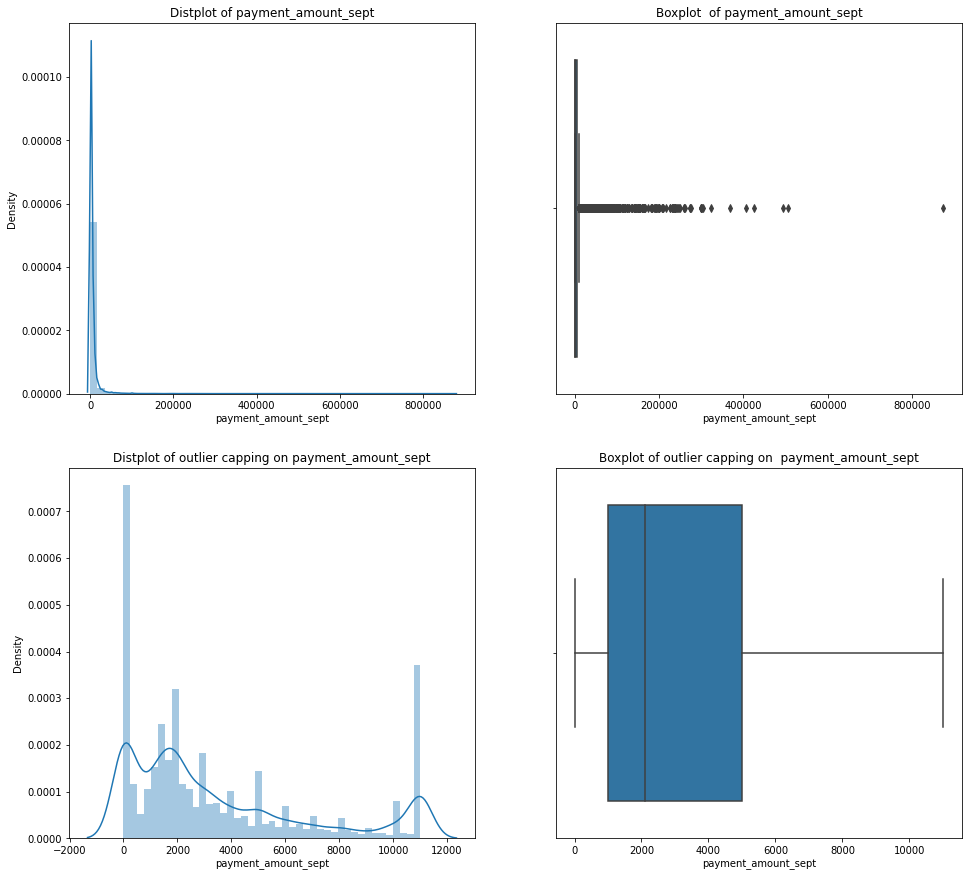

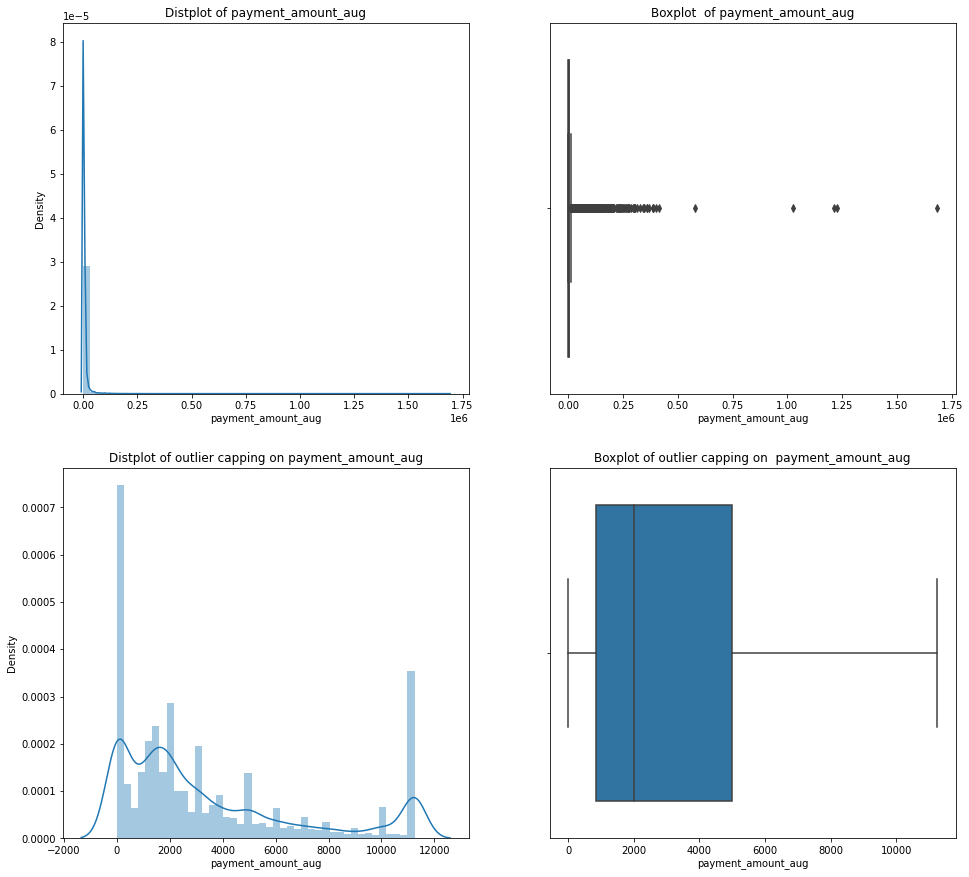

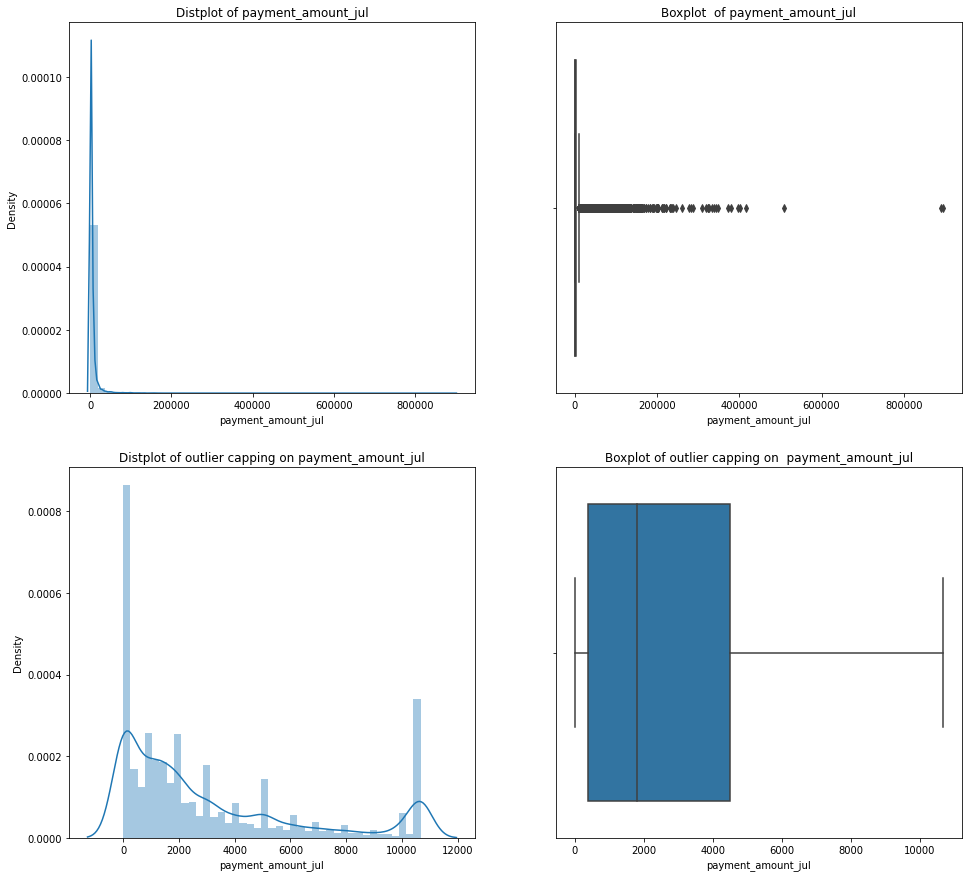

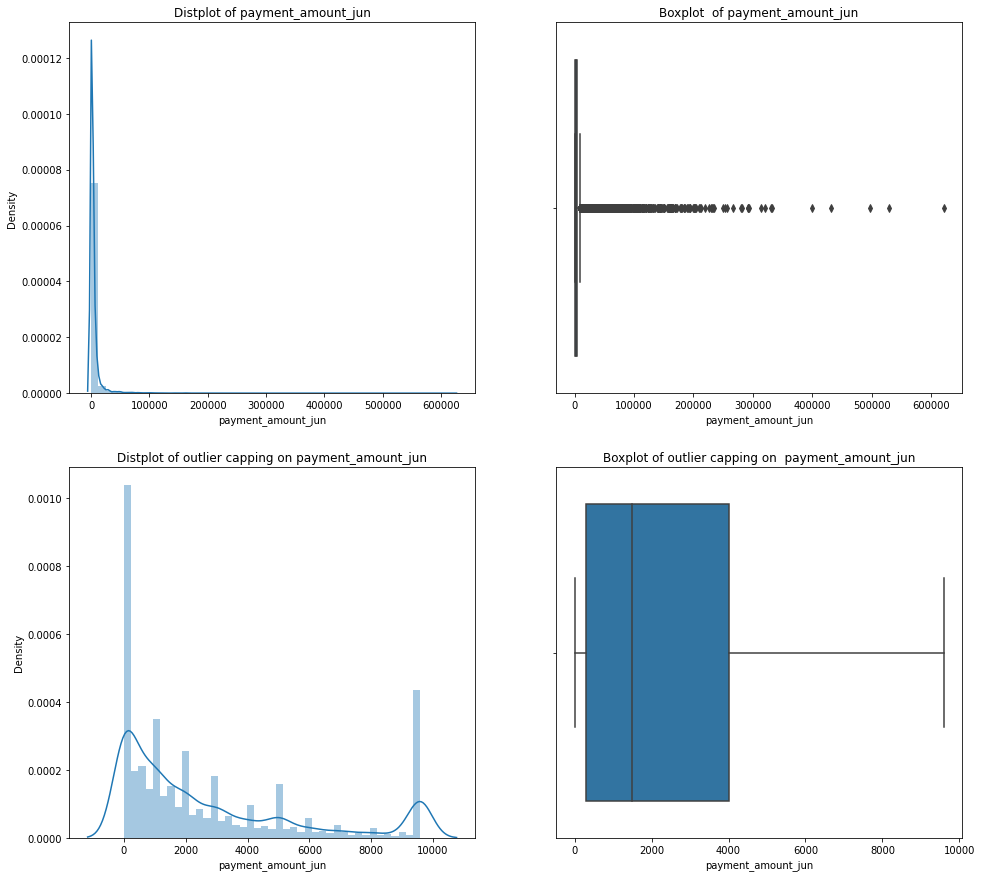

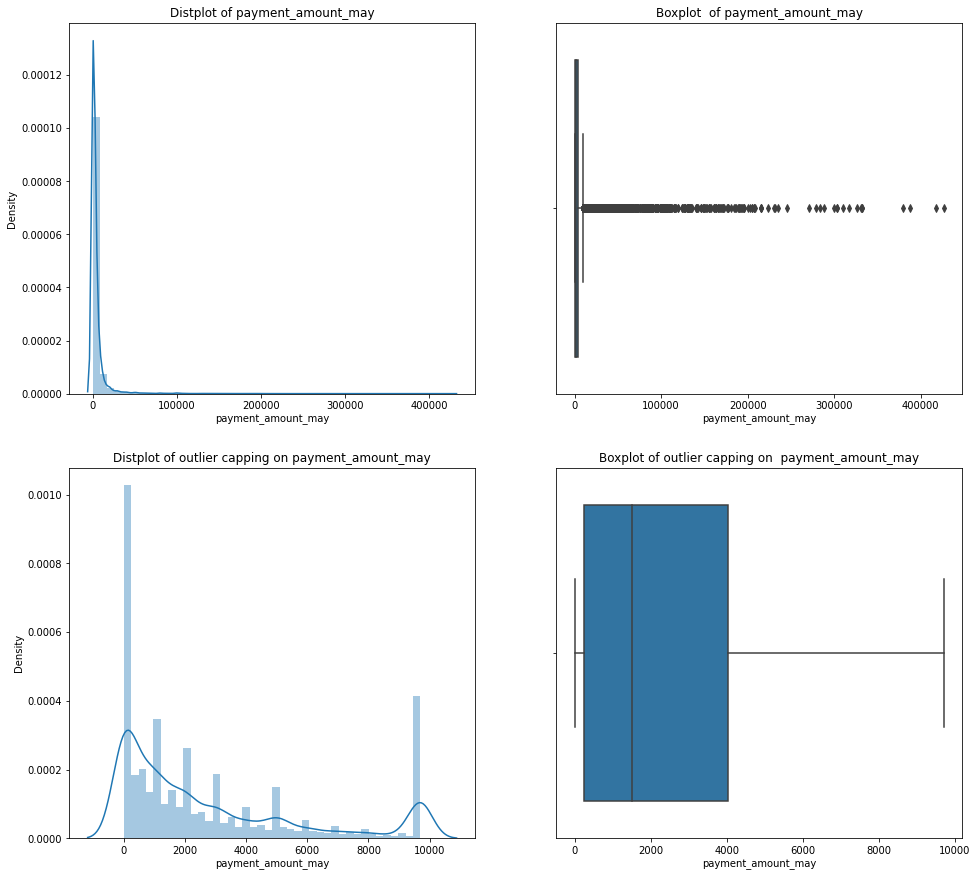

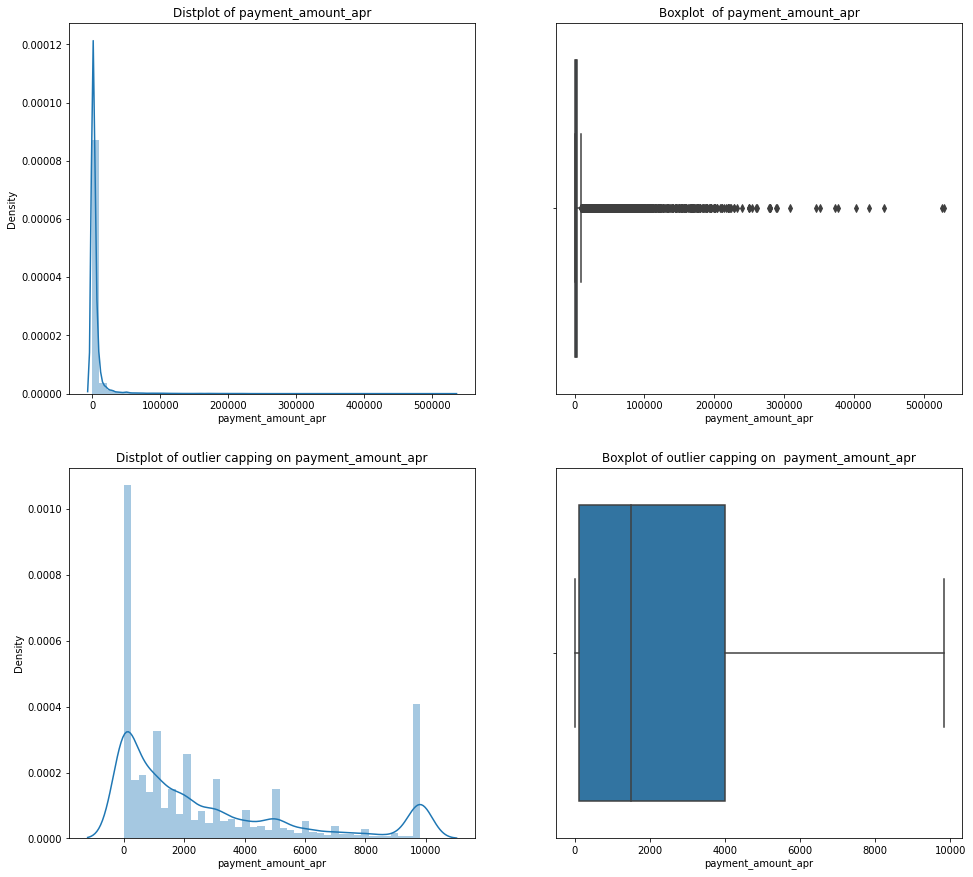

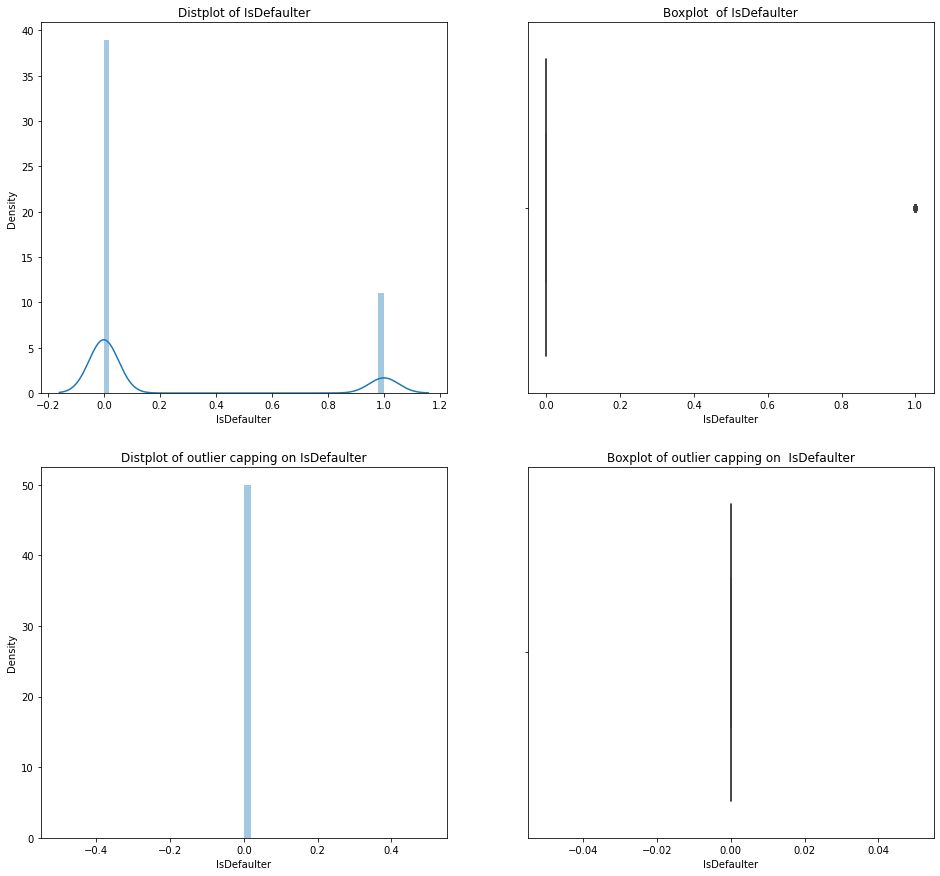

In [18]:
#creating a for loop to iterate over  and capp all the outliers on entire numerical features
for i in feat_num:
  p25 = feat_num[i].quantile(0.25) #creating a variabel for 25th percentile
  p75 = feat_num[i].quantile(0.75) #creating a variabel for 75th percentile
  iqr = p75-p25 #calculating the  interquartile range
  upper_limit = p75 + 1.5 * iqr # caculating the upper bound limit, above which the data will be considered outlier
  lower_limit = p75 - 1.5 * iqr # # caculating the lower bound limit, below  which the data will be considered outlier

  print(f'For {i} Upper limit is {upper_limit}, and lower limit is {lower_limit}') # printing the upper and lower limit of each feature

  feat_num[df[i] > upper_limit] #to check the outlier record
  feat_num[df[i] < lower_limit] #to check the outlier record
  new_df_cap = feat_num.copy() #definig new dataframe to store the oulier capped dataset
  new_df_cap[i] = np.where(new_df_cap[i] > upper_limit, upper_limit, 
    np.where(new_df_cap[i] < lower_limit, lower_limit,new_df_cap[i])) # replacing the outliers with the  specifed limits

#ploting a figure to compare the difference in distribution of data
  plt.figure(figsize = (16,15)) 
  plt.subplot(2,2,1)
  sns.distplot(df[i])
  plt.title(f'Distplot of {i}')
  plt.subplot(2,2,2)
  sns.boxplot(df[i])
  plt.title(f'Boxplot  of {i}')
  plt.subplot(2,2,3)
  sns.distplot(new_df_cap[i])
  plt.title(f'Distplot of outlier capping on {i}')
  plt.subplot(2,2,4)
  sns.boxplot(new_df_cap[i])
  plt.title(f'Boxplot of outlier capping on  {i}')

**Exploratory Data Analysis**

**Univariate analysis**

The key objective of Univariate analysis is to simply describe the data and visualize various features to find patterns within the data.

**Visualizing the dependent Variable:**

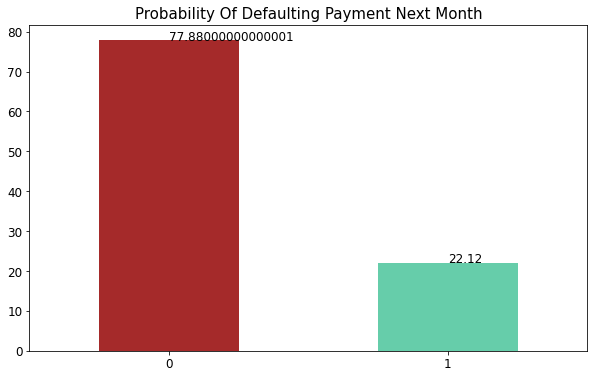

In [19]:
#plotting the count plot to vizualize the data distribution 
def_cnt = (df.IsDefaulter.value_counts(normalize=True)*100) #calculating percetnage of the datapoints. Normalize is used to divide the total into each of the category presernt in the dataset
def_cnt.plot.bar(figsize=(10,6), color = ['brown','mediumaquamarine']) #plotting a bar plot
plt.xticks(fontsize=12, rotation=0) #adjusting size and adding x ticks, rotation =0 means the x labels will be same
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15) # title of plot
for x,y in zip([0,1],def_cnt): # to annotate the values on top of the bars
    plt.text(x,y,y,fontsize=12)
plt.show()

In [20]:
# checking the balance of the dependent variable by counting the values of each unique set.
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

Observations

0 - Not Default
1 - Default
1. There is a huge difference between both classes so we have to work on this class imbalance.
2. About 22% people are expected to default next month and 77.8% are not expected to default

Independent Variables:

Categorical Features

Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.

Let's check how they are related with out target class.We have few categorical features in our dataset. Let'Check how they are related with out target class.

gender - 
1 - Male, 2 - Female

In [21]:
# Change gender code to 'F' and 'M' and use category as datatype to get better readability

df["gender"]=df["gender"].map({1:'M',2:'F'}).astype('category')
df["gender"].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [22]:
# understanding the distribution of male and female in the dataset
df['gender'].value_counts(normalize = True)

F    0.6
M    0.4
Name: gender, dtype: float64

Most of the credit card users are female which counts to 60% of total data.

In [23]:
cred_df=df

In [24]:
cred_df.head()

,credit_limit,gender,education,marital_status,age,payment_status_sept,payment_status_aug,payment_status_jul,payment_status_jun,payment_status_may,payment_status_apr,bill_sept,bill_aug,bill_jul,bill_jun,bill_may,bill_apr,payment_amount_sept,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,IsDefaulter
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,F,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,F,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,F,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,F,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,M,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Marriage

1 = married; 2 = single; 3 = others

In [25]:
#checking marital status 
cred_df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

Only few values are there for class 0, which is not determined also.So I am adding them in Others category.

In [26]:
m_comb = cred_df['marital_status'] == 0
cred_df.loc[m_comb, 'marital_status'] = 3
cred_df['marital_status'].value_counts(normalize = True)

2    0.53
1    0.46
3    0.01
Name: marital_status, dtype: float64

Majorly, around 53% of credit card were owned by married customer.

**payment_status_sept**

-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above

In [27]:
#checking previous month payment status
cred_df['payment_status_sept'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: payment_status_sept, dtype: int64

Since, there are 0,-2, 02 are also present, but as per our stated description, we know that -1 is paid on time. So, we will merge all these columns to -1

In [28]:
pay_comb  = (cred_df['payment_status_sept'] == 0) | (cred_df['payment_status_sept'] == -2) #getting the set of values containing -2,0 by creating condition
cred_df.loc[pay_comb, 'payment_status_sept'] = -1 #mapping the condition to replace those with -1
cred_df['payment_status_sept'].value_counts(normalize = True)*100 #checking  the percentage of data

-1    77.27
 1    12.29
 2     8.89
 3     1.07
 4     0.25
 5     0.09
 8     0.06
 6     0.04
 7     0.03
Name: payment_status_sept, dtype: float64

around 77% customers paid the september bill on time.

**payment_status_aug**

In [29]:
#checking previous month payment status
cred_df['payment_status_aug'].value_counts()

#Since, there are 0,-2, 02 are also present, but as per our stated description, 
#we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_aug  = (cred_df['payment_status_aug'] == 0) | (cred_df['payment_status_aug'] == -2) #getting the set of values containing -2,0 by creating condition
cred_df.loc[pay_comb_aug, 'payment_status_aug'] = -1 #mapping the condition to replace those with -1
cred_df['payment_status_aug'].value_counts(normalize = True)  #checking the coun

-1    8.52e-01
 2    1.31e-01
 3    1.09e-02
 4    3.30e-03
 1    9.33e-04
 5    8.33e-04
 7    6.67e-04
 6    4.00e-04
 8    3.33e-05
Name: payment_status_aug, dtype: float64

Around 85% customers has paid the bill of august on time.

**payment_status_jul**

In [30]:
#checking previous month payment status
cred_df['payment_status_jul'].value_counts()

#Since, there are 0,-2, 02 are also present, but as per our stated description, 
#we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_aug  = (cred_df['payment_status_jul'] == 0) | (cred_df['payment_status_jul'] == -2) #getting the set of values containing -2,0 by creating condition
cred_df.loc[pay_comb_aug, 'payment_status_jul'] = -1 #mapping the condition to replace those with -1
cred_df['payment_status_jul'].value_counts(normalize = True)  #checking the c

-1    8.60e-01
 2    1.27e-01
 3    8.00e-03
 4    2.53e-03
 7    9.00e-04
 6    7.67e-04
 5    7.00e-04
 1    1.33e-04
 8    1.00e-04
Name: payment_status_jul, dtype: float64

Around 86% customers had paid july bill on time

**payment_status_jun**

In [31]:
#checking previous month payment status
cred_df['payment_status_jun'].value_counts()

#Since, there are 0,-2, 02 are also present, but as per our stated description, 
#we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_aug  = (cred_df['payment_status_jun'] == 0) | (cred_df['payment_status_jun'] == -2) #getting the set of values containing -2,0 by creating condition
cred_df.loc[pay_comb_aug, 'payment_status_jun'] = -1 #mapping the condition to replace those with -1
cred_df['payment_status_jun'].value_counts(normalize = True)  #checking the count

-1    8.83e-01
 2    1.05e-01
 3    6.00e-03
 4    2.30e-03
 7    1.93e-03
 5    1.17e-03
 6    1.67e-04
 1    6.67e-05
 8    6.67e-05
Name: payment_status_jun, dtype: float64

Around 88% of customers had paid the june bill on time.

**payment_status_may**

In [32]:
#checking previous month payment status
cred_df['payment_status_may'].value_counts()

#Since, there are 0,-2, 02 are also present, but as per our stated description, 
#we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_aug  = (cred_df['payment_status_may'] == 0) | (cred_df['payment_status_may'] == -2) #getting the set of values containing -2,0 by creating condition
cred_df.loc[pay_comb_aug, 'payment_status_may'] = -1 #mapping the condition to replace those with -1
cred_df['payment_status_may'].value_counts(normalize = True)  #checking the count of d

-1    9.01e-01
 2    8.75e-02
 3    5.93e-03
 4    2.80e-03
 7    1.93e-03
 5    5.67e-04
 6    1.33e-04
 8    3.33e-05
Name: payment_status_may, dtype: float64

Aroung 90% of the uctomers has the paid the may bill on time.

**payment_status_apr**

In [33]:
#checking previous month payment status
cred_df['payment_status_apr'].value_counts()

#Since, there are 0,-2, 02 are also present, but as per our stated description, 
#we know that -1 is paid on time. So, we will merge all these columns to -1.

pay_comb_aug  = (cred_df['payment_status_apr'] == 0) | (cred_df['payment_status_apr'] == -2) #getting the set of values containing -2,0 by creating condition
cred_df.loc[pay_comb_aug, 'payment_status_apr'] = -1 #mapping the condition to replace those with -1
cred_df['payment_status_apr'].value_counts(normalize = True)  #checking the count of

-1    8.97e-01
 2    9.22e-02
 3    6.13e-03
 4    1.63e-03
 7    1.53e-03
 6    6.33e-04
 5    4.33e-04
 8    6.67e-05
Name: payment_status_apr, dtype: float64

Around 89% of the customers paid duly the april bill.

Overall, around 80% of the customers had paid the previous month bill on time. The defaulter rate was very very less.

**Plotting the categorical features**

In [34]:
#creating a dataframe to store the categorical features
categorical_features = ['gender', 'education', 'marital_status','payment_status_sept','payment_status_aug','payment_status_jul',
    'payment_status_jun','payment_status_may','payment_status_apr','age']

In [35]:
#saving required feature in a new dataframe to ease the analysis
cat_df = cred_df[categorical_features]
cat_df['Defaulter'] = cred_df['IsDefaulter']

In [36]:
#since, the values were label encoded. We are decoding the labels for clearer visualization
cat_df.replace({'gender': {1 : 'MALE', 2 : 'FEMALE'},
                'education' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
                'marital_status' :  {1 : 'Married', 2 : 'Single', 3 : 'Others'}},inplace=True)

<Figure size 720x360 with 0 Axes>

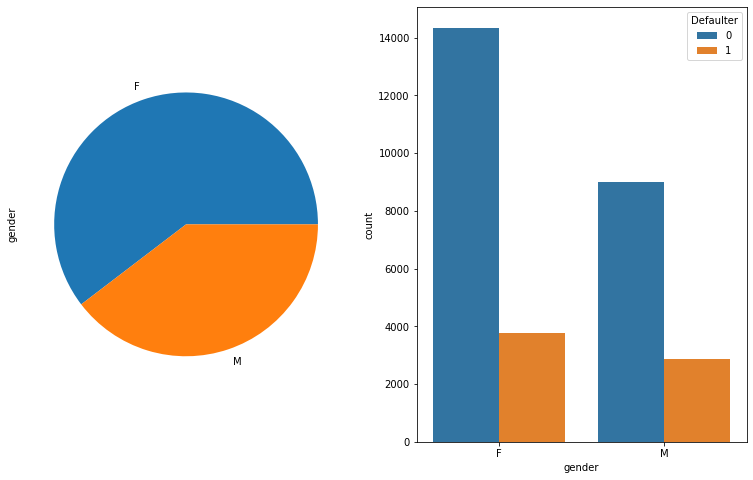

<Figure size 720x360 with 0 Axes>

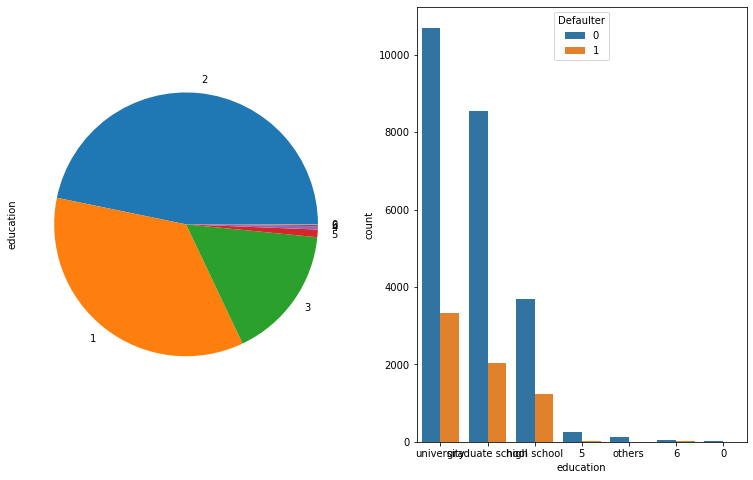

<Figure size 720x360 with 0 Axes>

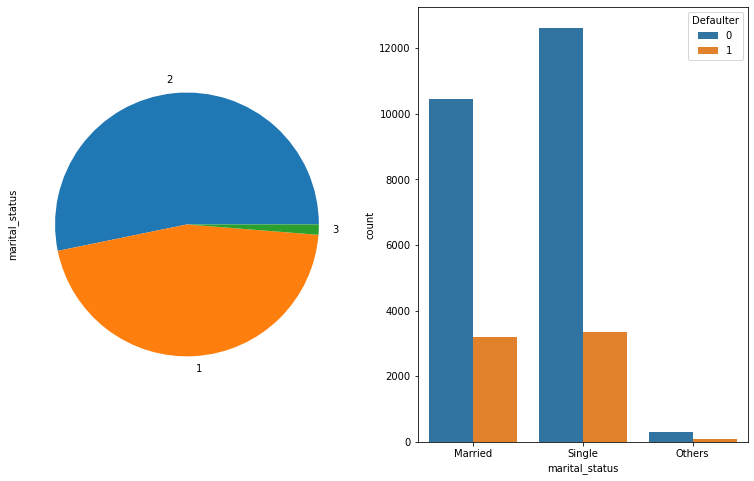

<Figure size 720x360 with 0 Axes>

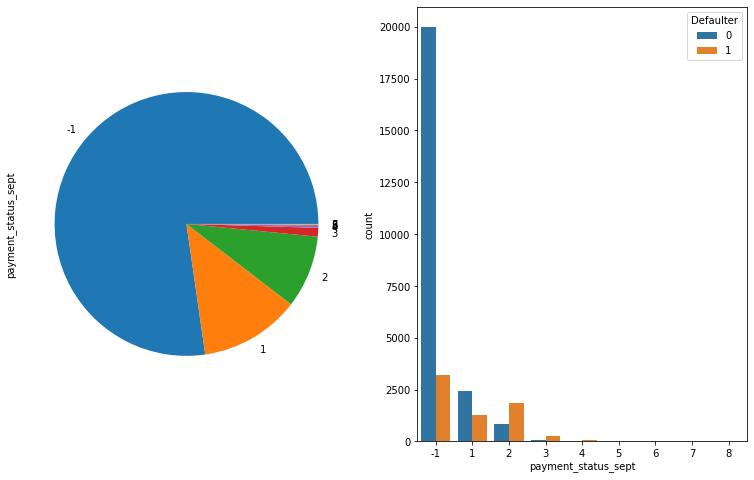

<Figure size 720x360 with 0 Axes>

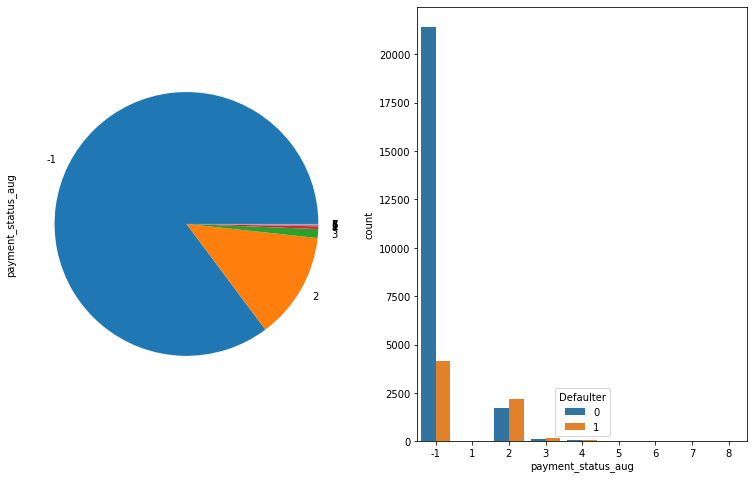

<Figure size 720x360 with 0 Axes>

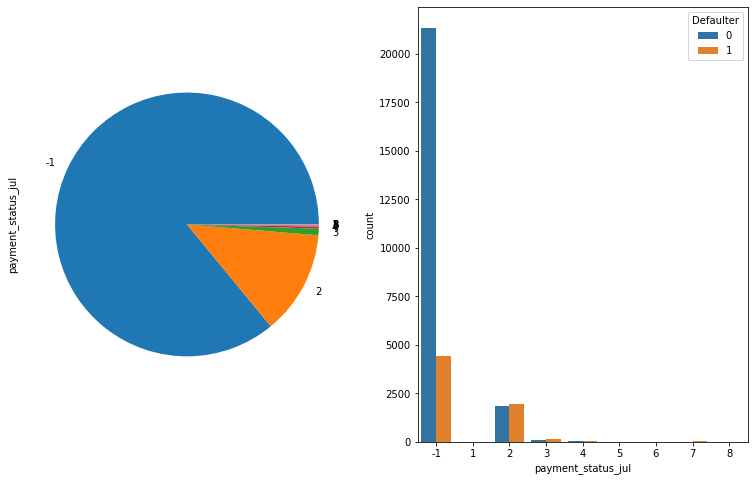

<Figure size 720x360 with 0 Axes>

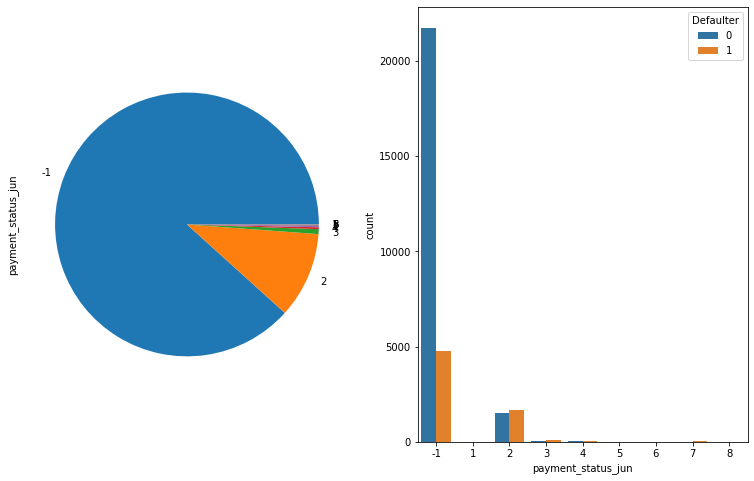

<Figure size 720x360 with 0 Axes>

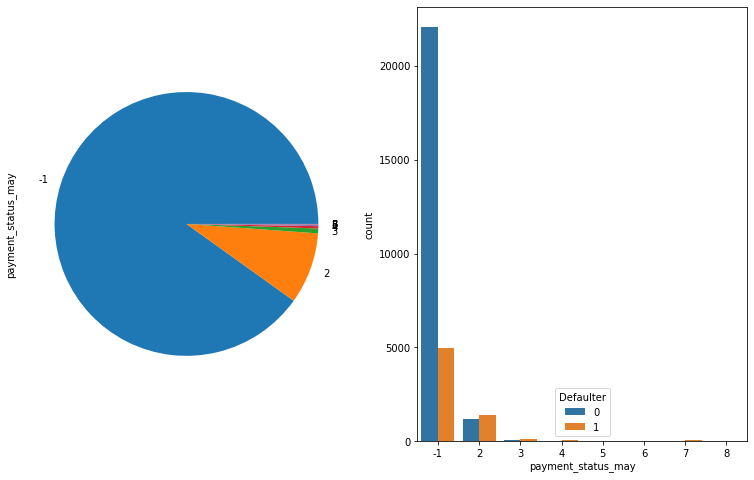

<Figure size 720x360 with 0 Axes>

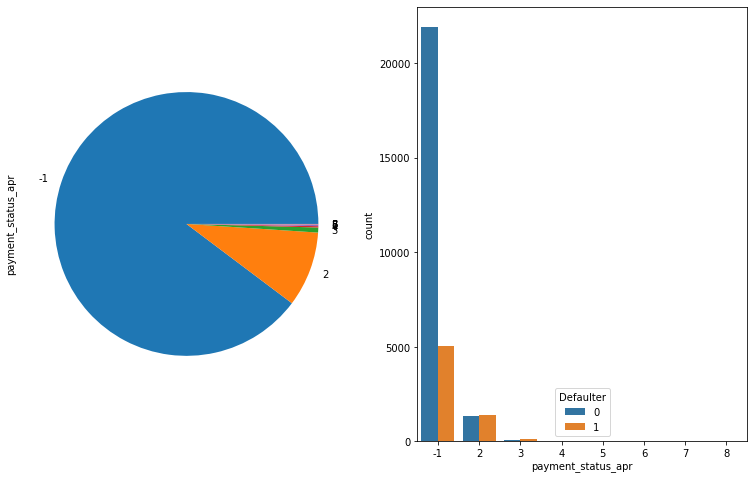

<Figure size 720x360 with 0 Axes>

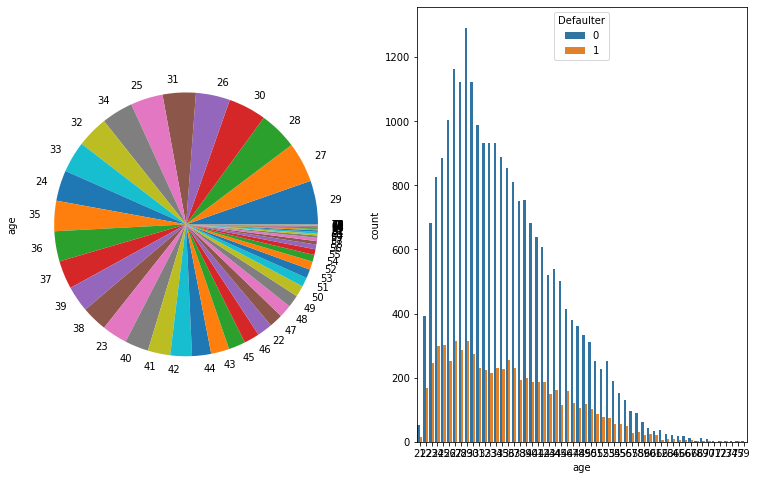

In [37]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  cred_df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = cat_df)

Since there are more female credit card holder the no.of defaulter have high proportion of females.

No. of defaulters have a higher proportion of educated people (graduate school and university)

In case of 'Marital_status' both singles and married people are having high proportion in No.Of defaulters,but proportion of singles are higher by a small amount.

> Since there are more female than male in the dataset,we can't say females tends to have more delayed payments. So we will use percentage within each sex group and plot the results.

In [38]:
# Create a new column "has_def" to indicate customers who have at least 1 deafult payment from April to September
# 0 : no default ; 1: has default

def_condition = (cred_df.payment_status_sept >1) | (cred_df.payment_status_aug >1) | (cred_df.payment_status_jul >1) | (cred_df.payment_status_jun >1) | (cred_df.payment_status_may >1) | (cred_df.payment_status_apr >1)
cred_df.loc[def_condition, "has_def"] = 1
cred_df.loc[cred_df.has_def.isna(), "has_def"] = 0

In [39]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=cred_df['has_def'],columns = cat_df[column_name], normalize = 'columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns #creating label for the plot
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()
    
    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    #plotting the bar chart
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name, color = 'mediumaquamarine')
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name, color = 'brown')

#formatting the plot
    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

 #adding x and y ticks   
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

#to annotate the plot
    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="black", fontsize=11)
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="k", fontsize=11)

    plt.show()

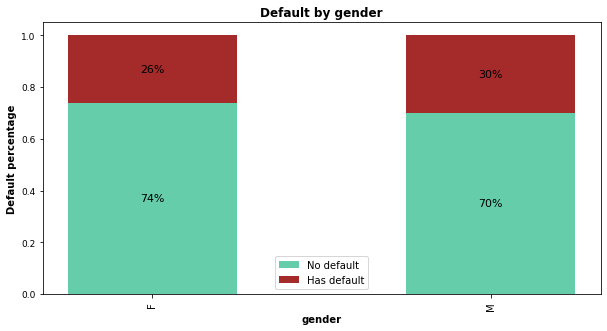

In [40]:
# Plot a stacked bar chart to visualize default percentage by female and male

create_stacked_bar('gender')

Since we awere not able to comment on female defaulter being at majority by the previous data . Now, it is clear although there were more female defaulter but the rate of being defaulter is comparitevely higher in males with 30% of total defaulters comapared to 26% of female defaulter respectively.

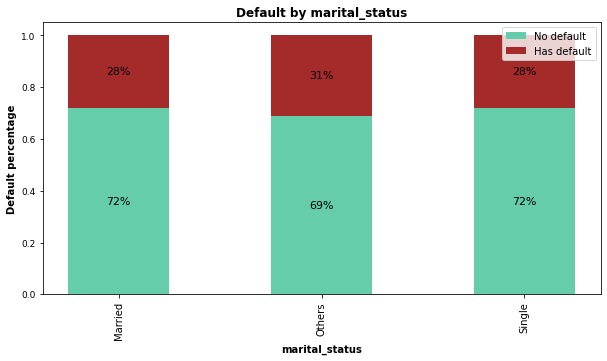

In [41]:
# Plot a stacked bar chart to show default as per marital status
create_stacked_bar('marital_status')

As we can see in chart, we can infer that there is quite similar distribution of defaulters in each category indicating marital status does not influence the defaulter customers. However, dominant category for defaulter is others.

Since there are more educated people than people with basic high_school qualification,we can't say educated people tends to have more delayed payments. So we will use percentage within each education group and plot the results.

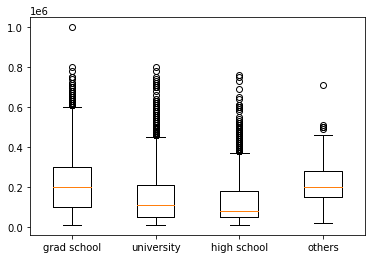

In [42]:
# Using boxplot to visualize credit limit grouped by education level

data = []
for i in [1,2,3,4]:
    temp = cred_df.loc[cred_df.education == i,"credit_limit"]
    data.append(temp)  #created a list which stored the data that satisfies the above given condition.s

fig, ax = plt.subplots()
ax.boxplot(data) #plotting a box plot
ax.set_xticklabels(["grad school", "university", "high school","others"]) #setting the tick labels

plt.show()

From the boxplot, it is clear that customers with grad school education have the highest median and highest maximum number, so we can say that people with higher education levels did get higher credit limits.

Lets find out people at what age missing payment deadline most

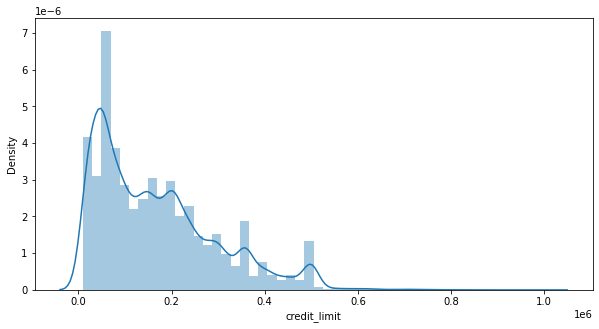

In [43]:
# Checking the descriptive statistics of Limit Balance feature in the dataset
cred_df['credit_limit'].describe()

# Plotting the distribution of Limit Balance feature
plt.figure(figsize = (10,5))
sns.distplot(cred_df['credit_limit'], kde = True)
plt.show()

Maximum amount of given credit is 50000 NT dollars followed by 30000 and 20000.

In [44]:
# Segment the 'AGE' column to 6 groups

bins= [21,30,40,50,60,70,80] #creating bins 
labels = ['20-30','30-40','40-50','50-60','60-70','70-80'] #labelling the age interval
cat_df['age'] = pd.cut(cat_df['age'],bins=bins, labels=labels,right=False)

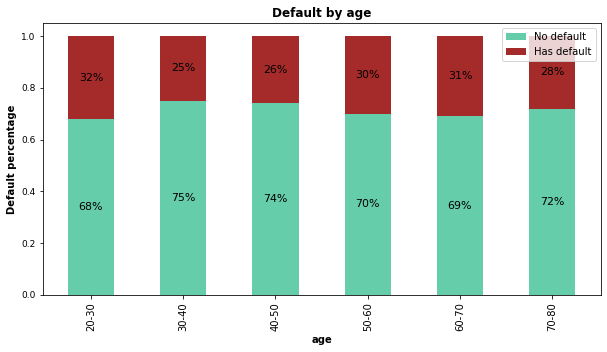

In [45]:
create_stacked_bar('age') #plotting stacked bar of defaulters as per the age

Customers aged between 30-50 had the lowest delayed payment rate, while younger groups (20-30) and older groups (50-70) all had higher delayed payment rates. However, the delayed rate dropped slightly again in customers older than 70 years.

Lets check the correlation between credit limit and the default payment next month

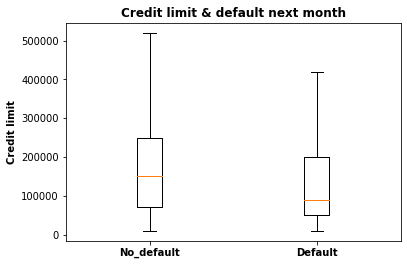

In [46]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = cred_df.loc[cred_df['IsDefaulter'] == 0,'credit_limit']
def1 = cred_df.loc[cred_df['IsDefaulter'] == 1,'credit_limit']

#plotting the figure
fig, ax = plt.subplots() 
ax.boxplot([def0, def1],  showfliers=False)

#formattting the plot
ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

Customers with high credit limits tend to pay the pay on time and hence are not defaulters.

> Understanding relation between bill amount and payment done in 6 months.



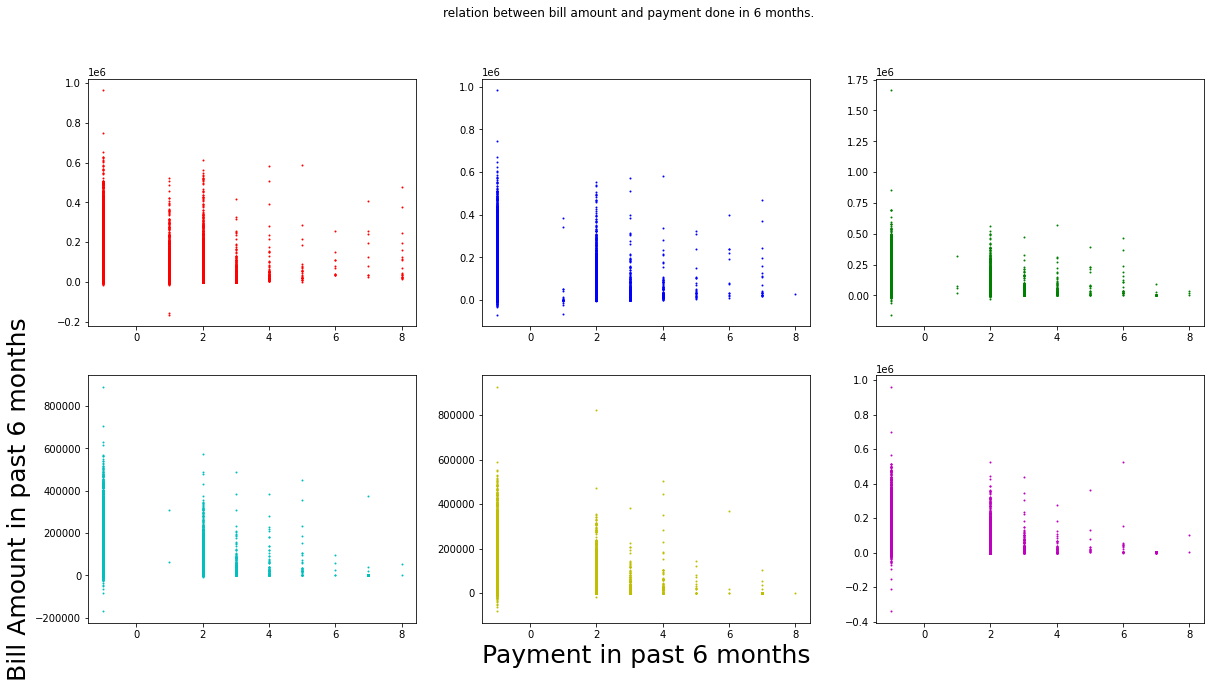

In [47]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=cred_df.payment_status_sept, y=cred_df.bill_sept, c='r', s=1)

plt.subplot(232)
plt.scatter(x=cred_df.payment_status_aug, y=cred_df.bill_aug, c='b', s=1)

plt.subplot(233)
plt.scatter(x=cred_df.payment_status_jul, y=cred_df.bill_jul, c='g', s=1)

plt.subplot(234)
plt.scatter(x=cred_df.payment_status_jun, y=cred_df.bill_jun, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=cred_df.payment_status_may, y=cred_df.bill_may, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=cred_df.payment_status_apr, y=cred_df.bill_apr, c='m', s=1)

plt.suptitle('relation between bill amount and payment done in 6 months.')
plt.show()

Above plot indicates that there is higher proportion of clients for whom the bill amount is high but payment done against the same is very low.

This we can infer since maximum of data points are closely packed along the Y-axis near to 0 on X-axis.

 Total bill amount

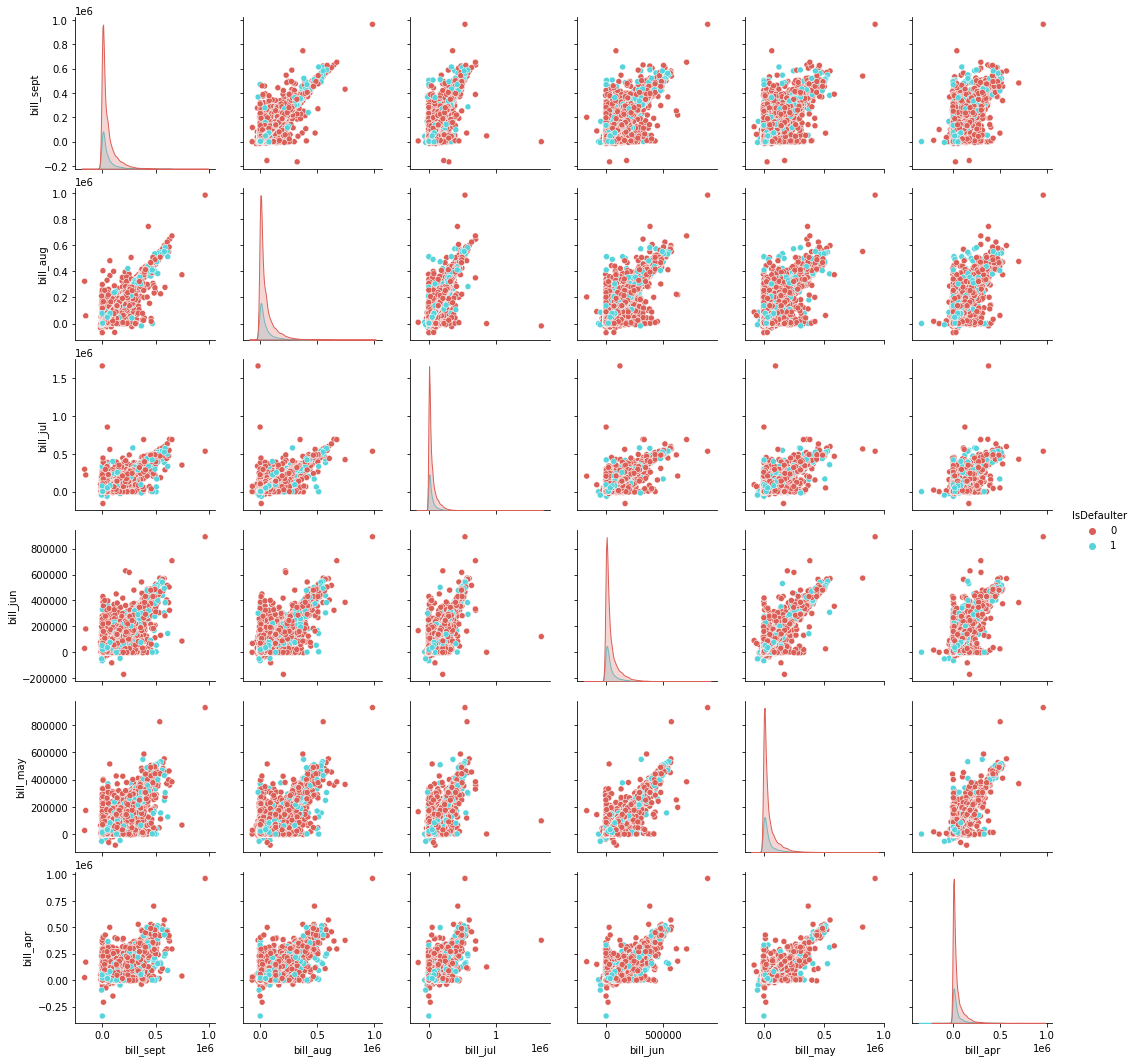

In [48]:
# assign the bill amount variable to a single variable
total_bill_amt_df = cred_df[['bill_sept',	'bill_aug',	'bill_jul',	'bill_jun',	'bill_may',	'bill_apr', 'IsDefaulter']]

# plotting pair plot for bill amount for better visualization
sns.pairplot(data = total_bill_amt_df, hue = 'IsDefaulter', palette = 'hls')

The above pairplot indicates that defaulters have less bill amount compared to non defaulters.

Why are there negative bills?

In [49]:
# Get statistic summary of bill statement columns

bill = cred_df[['bill_apr', 'bill_may', 'bill_jun', 'bill_jul','bill_aug', 'bill_sept']]
bill.describe()

,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sept
count,30000.00,30000.00,30000.00,3.00e+04,30000.00,30000.00
mean,38871.76,40311.40,43262.95,4.70e+04,49179.08,51223.33
std,59554.11,60797.16,64332.86,6.93e+04,71173.77,73635.86
min,-339603.00,-81334.00,-170000.00,-1.57e+05,-69777.00,-165580.00
25%,1256.00,1763.00,2326.75,2.67e+03,2984.75,3558.75
50%,17071.00,18104.50,19052.00,2.01e+04,21200.00,22381.50
75%,49198.25,50190.50,54506.00,6.02e+04,64006.25,67091.00
max,961664.00,927171.00,891586.00,1.66e+06,983931.00,964511.00


In [50]:
# How many bills have negative amount?

bill_melt = pd.melt(bill, var_name = 'bills',value_name = 'count') # to chenge the datafraem format
neg_bill = bill_melt[bill_melt['count']<0]
neg_bill.groupby('bills').count()  #counting the negative bill

,count
bills,
bill_apr,688
bill_aug,669
bill_jul,655
bill_jun,675
bill_may,655
bill_sept,590


There are 3932 bills with negative amounts, each month has 590-688 records

In [51]:
# Get the average amount of negative bill each month

neg_bill_mean_ndt = neg_bill.groupby('bills')['count'].mean()

print('Average negative amounts are: \n')
print(neg_bill_mean_ndt)

Average negative amounts are: 

bills
bill_apr    -3074.49
bill_aug    -1230.62
bill_jul    -1466.29
bill_jun    -1631.24
bill_may    -1634.71
bill_sept   -1154.80
Name: count, dtype: float64


In [52]:
neg_bill_mean_ndt.describe()

count       6.00
mean    -1698.69
std       702.91
min     -3074.49
25%     -1633.84
50%     -1548.77
75%     -1289.54
max     -1154.80
Name: count, dtype: float64

The average negative amount is 1698 NDT which is very less when comparing with total bill amount of each month so we can guess that this would be refunds from the last billing cycles.

> Why are some bill statement amounts greater than credit limit?

In [53]:
# Is there any bill amount that is greater than credit limit?

#checking for such bill amount in the dataset
condition1 = cred_df['bill_apr'] > cred_df['credit_limit'] 
condition2 = cred_df['bill_may'] > cred_df['credit_limit'] 
condition3 = cred_df['bill_jun'] > cred_df['credit_limit'] 
condition4 = cred_df['bill_jul'] > cred_df['credit_limit'] 
condition5 = cred_df['bill_aug'] > cred_df['credit_limit'] 
condition6 = cred_df['bill_sept'] > cred_df['credit_limit'] 

large_bill = cred_df[condition1 | condition2 |condition3 | condition4 | condition5 | condition6]
large_bill.shape

(3931, 25)

The bill statement amount shouldn't exceed credit limit, however, there are 3931 customers whose bill amounts are greater than credit limit. May be the difference is due to late payment interest, assuming these customers had delayed payment.

> Lets check is there any customer who never had any transaction, meaning bill amount in 6 months remained as 0

In [54]:
#checking the customer who has bill amount as 0 in last 6 month
bill_amt = cred_df[['bill_apr', 'bill_may','bill_jun', 'bill_jul', 'bill_aug', 'bill_sept']]
no_transaction = bill_amt[bill_amt.sum(axis=1) ==0]
no_transaction

,bill_apr,bill_may,bill_jun,bill_jul,bill_aug,bill_sept
ID,,,,,,
19,0,0,0,0,0,0
20,0,0,0,0,0,0
46,0,0,0,0,0,0
80,0,0,0,0,0,0
122,0,0,0,0,0,0
...,...,...,...,...,...,...
29909,0,0,0,0,0,0
29910,0,0,0,0,0,0
29974,0,0,0,0,0,0


In [55]:
no_transaction.shape

(870, 6)

There are 870 customers whose bill amount was 0 in last 6 months

> Now, lets check if those 870 customers defaulted in the next month (Oct.2005)

In [56]:
#checking whether those 870 customer with bill amount of 0 are defaulted in next month or not
no_transaction_de = cred_df.loc[no_transaction.index,['IsDefaulter']]
no_transaction_de.value_counts()

IsDefaulter
0              553
1              317
dtype: int64

317 customers whose bill amount was 0 in last 6 months had default payment which is against common sense.Lets assume these were happened due to some errors and we will convert it into class "0" while doing feature engineering.

**Finding Correlations**

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method. The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

00-.19 “very weak”

20-.39 “weak”

40-.59 “moderate”

60-.79 “strong”

80-1.0 “very strong”

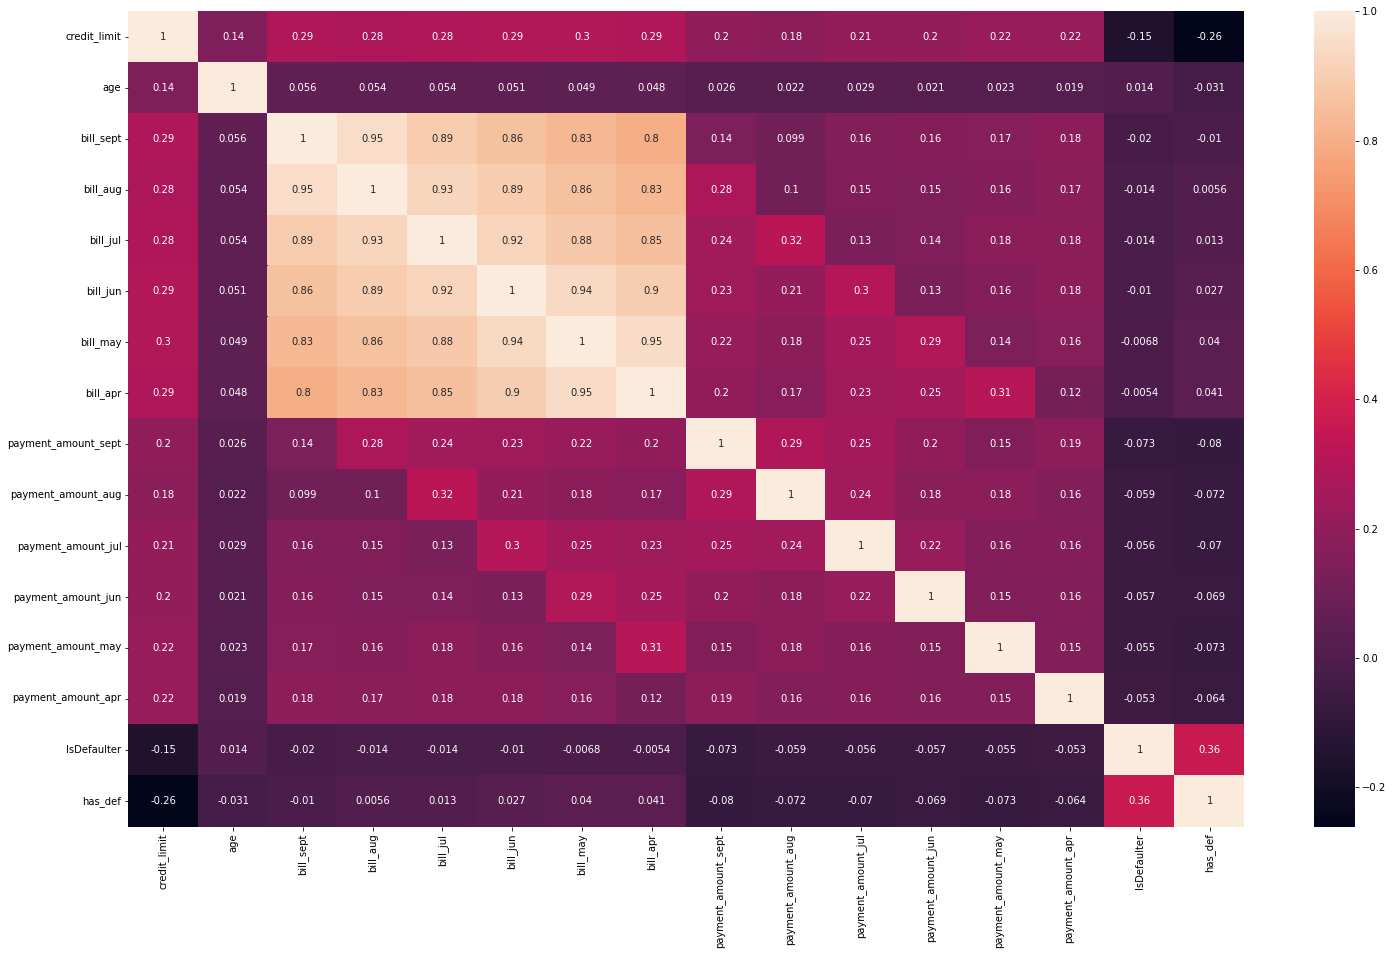

In [57]:
#plotting a heat map to understand correlation between features
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(cred_df.corr(),annot=True, ax=ax);

Since most of the features are categorical a heatmap doesn't give much insights about the correlation so lets try some statistical methods

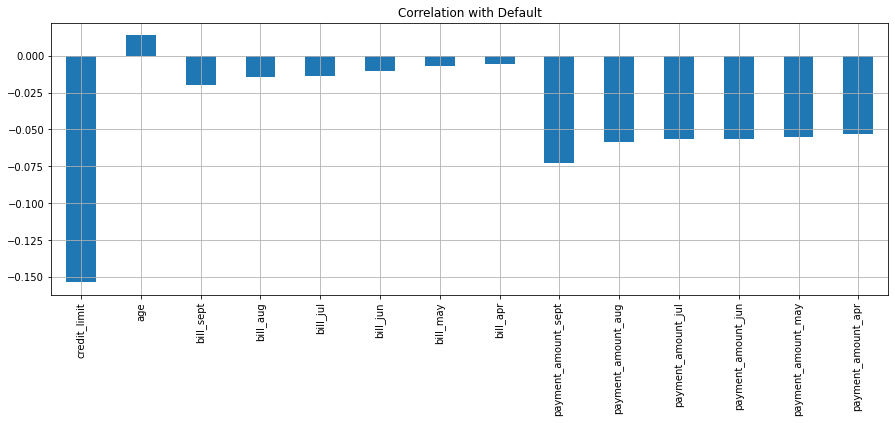

In [58]:
#plotting the feature importance as per peaarson correlation
X = cred_df.drop(['IsDefaulter','has_def'],axis=1) #dropping column which are not required at present
X.corrwith(cred_df['IsDefaulter']).plot.bar(figsize = (15, 5), title = "Correlation with Default",  #creating a bar plot of corrlation of features.
                                        fontsize = 10,rot = 90, grid = True)

From the above graph is that most negatively correlated feature is credit_limit, but we cannot blindly remove this feature because it is a very important feature for prediction. ID is not important and it has no role in prediction so we will remove it while doing feature engineering.

**Statistical Analysis for Correlation**

Correlation between credit limit and bill amount: Pearson R

Correlation between credit limit and payment default: t-test

Correlation between education and payment default: chi-squared test

Correlation between age and payment default: chi-squared test

Correlation between sex and payment default: permutation test

Correlation between sex and credit limit: t-test

1.Correlation between credit limit and bill amount.

We assume customers who have a high credit limit will have a higher bill amount.

In [59]:
#finding  whether the customer with high credit limit has high bill amount as well
cred_df['bill_sum'] = cred_df[['bill_apr', 'bill_may', 'bill_jun', 'bill_jul',
       'bill_aug', 'bill_sept']].sum(axis=1)
credit_bill = cred_df[['credit_limit','bill_sum']]       
credit_bill.corr() #finding correlation

,credit_limit,bill_sum
credit_limit,1.0,0.3
bill_sum,0.3,1.0


In [60]:
#calculating person correlation between the credit limit and bill amount
credit_limit = cred_df['credit_limit']
bill_amount = cred_df[['bill_apr', 'bill_may', 'bill_jun', 'bill_jul',
       'bill_aug', 'bill_sept']].sum(axis=1)

stats.pearsonr(credit_limit, bill_amount)

NameError: ignored